In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import seaborn as sns
#inspiration and graphing code taken from
#https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html
#original svm code based on
#https://scikit-learn.org/stable/modules/svm.html

In [83]:
train_data = pd.read_csv('../question2_1000.txt',header=None).values
X, y = train_data[:,:2], train_data[:,2]
gamma_vals

array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])

In [12]:
kf = KFold(n_splits=10, random_state=None, shuffle=True)
## for loop for c and gaussian parameter 
gamma_n = 10
c_n = 10
gamma_vals = np.logspace(-5,3,num=gamma_n)
c_vals = np.logspace(-5,4,num=c_n)
error_grid = np.zeros((gamma_n,c_n))
for gamma_idx,gamma in enumerate(gamma_vals):
    print(gamma_idx)
    for c_idx,c in enumerate(c_vals):
        print('cidx',c)
        cv_p_errors = []
        for train_index, test_index in kf.split(X):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            rbf_svc = svm.SVC(kernel='rbf',gamma=gamma,C=c)
            rbf_svc.fit(X_train, y_train)
            pred = rbf_svc.predict(X_test)
            P_true = accuracy_score(y_test,pred)
            cv_p_errors.append(1-P_true)
        error_grid[gamma_idx,c_idx]=np.mean(cv_p_errors)

0
cidx 1e-05
cidx 0.0001
cidx 0.001
cidx 0.01
cidx 0.1
cidx 1.0
cidx 10.0
cidx 100.0
cidx 1000.0
cidx 10000.0
1
cidx 1e-05
cidx 0.0001
cidx 0.001
cidx 0.01
cidx 0.1
cidx 1.0
cidx 10.0
cidx 100.0
cidx 1000.0
cidx 10000.0
2
cidx 1e-05
cidx 0.0001
cidx 0.001
cidx 0.01
cidx 0.1
cidx 1.0
cidx 10.0
cidx 100.0
cidx 1000.0
cidx 10000.0
3
cidx 1e-05
cidx 0.0001
cidx 0.001
cidx 0.01
cidx 0.1
cidx 1.0
cidx 10.0
cidx 100.0
cidx 1000.0
cidx 10000.0
4
cidx 1e-05
cidx 0.0001
cidx 0.001
cidx 0.01
cidx 0.1
cidx 1.0
cidx 10.0
cidx 100.0
cidx 1000.0
cidx 10000.0
5
cidx 1e-05
cidx 0.0001
cidx 0.001
cidx 0.01
cidx 0.1
cidx 1.0
cidx 10.0
cidx 100.0
cidx 1000.0
cidx 10000.0
6
cidx 1e-05
cidx 0.0001
cidx 0.001
cidx 0.01
cidx 0.1
cidx 1.0
cidx 10.0
cidx 100.0
cidx 1000.0
cidx 10000.0
7
cidx 1e-05
cidx 0.0001
cidx 0.001
cidx 0.01
cidx 0.1
cidx 1.0
cidx 10.0
cidx 100.0
cidx 1000.0
cidx 10000.0
8
cidx 1e-05
cidx 0.0001
cidx 0.001
cidx 0.01
cidx 0.1
cidx 1.0
cidx 10.0
cidx 100.0
cidx 1000.0
cidx 10000.0
9
cidx 1e-

<AxesSubplot:>

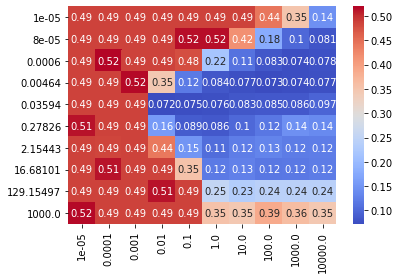

In [85]:
sns.heatmap(error_grid,
            annot=True,
            cmap='coolwarm',
            xticklabels=np.round(c_vals,5),
            yticklabels=np.round(gamma_vals,5), fmt='.2')

0.9277

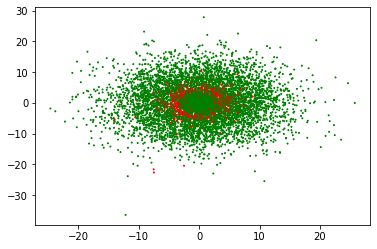

In [122]:
test_data = pd.read_csv('../question2_10000.txt',header=None).values.T
test_X, test_y = test_data[:,:2], test_data[:,2]

# found these values based on the above map of possible values where the 4th gamma value and 8th c value provide the
# lowest p(error) in the training/validation samples
opt_gamma = gamma_vals[3]
opt_c = c_vals[7]

#train classifier with the 
opt_rbf_svc = svm.SVC(kernel='rbf',gamma=opt_gamma,C=opt_c)
opt_rbf_svc.fit(X, y)
opt_pred = opt_rbf_svc.predict(test_X)

correct= opt_pred==test_y
colors = ['g' if class_correct==1 else 'r' for class_correct in correct]
plt.scatter(test_X[:,0],test_X[:,1],c=colors,s=1)

opt_true = accuracy_score(test_y,opt_pred)
opt_true

0.8209

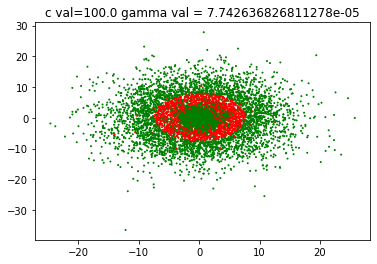

In [131]:

test_data = pd.read_csv('../question2_10000.txt',header=None).values.T
test_X, test_y = test_data[:,:2], test_data[:,2]

# found these values based on the above map of possible values where the 4th gamma value and 8th c value provide the
# lowest p(error) in the training/validation samples
in_opt_gamma = gamma_vals[1]
in_opt_c = c_vals[7]

#train classifier with the 
in_opt_rbf_svc = svm.SVC(kernel='rbf',gamma=in_opt_gamma,C=in_opt_c)
in_opt_rbf_svc.fit(X, y)
in_opt_pred = in_opt_rbf_svc.predict(test_X)

correct= in_opt_pred==test_y
colors = ['g' if class_correct==1 else 'r' for class_correct in correct]
plt.scatter(test_X[:,0],test_X[:,1],c=colors,s=1)
plt.title(f'c val={in_opt_c} gamma val = {in_opt_gamma}')

opt_true = accuracy_score(test_y,in_opt_pred)
opt_true

# Testing SVM Library

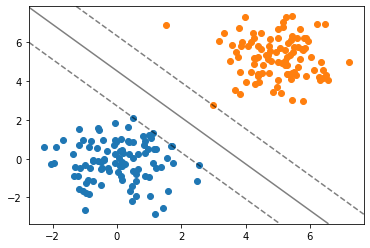

In [71]:
#graphing code based on: https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html
set_1 = np.random.randn(100,2)
set_2 = np.random.randn(100,2) + 5

plt.scatter(set_1[:,0],set_1[:,1])
plt.scatter(set_2[:,0],set_2[:,1])

full_data = np.zeros((200,3))
full_data[:100,:2]=set_1
full_data[:100,2]=1
full_data[100:,:2]=set_2
full_data[100:,2]=2
full_data



toy_svm = svm.SVC(kernel='linear')
toy_svm.fit(full_data[:,:2],full_data[:,2])


ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = toy_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

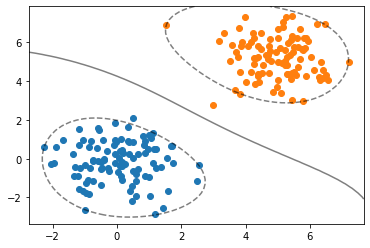

In [72]:
plt.scatter(set_1[:,0],set_1[:,1])
plt.scatter(set_2[:,0],set_2[:,1])

toy_svm = svm.SVC(kernel='rbf')
toy_svm.fit(full_data[:,:2],full_data[:,2])


ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = toy_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

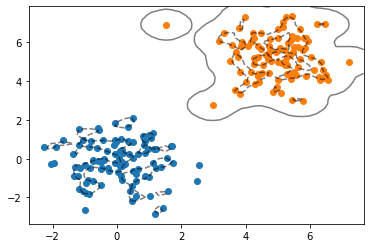

In [75]:
plt.scatter(set_1[:,0],set_1[:,1])
plt.scatter(set_2[:,0],set_2[:,1],)

toy_svm = svm.SVC(kernel='rbf',gamma=5)
toy_svm.fit(full_data[:,:2],full_data[:,2])


ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = toy_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

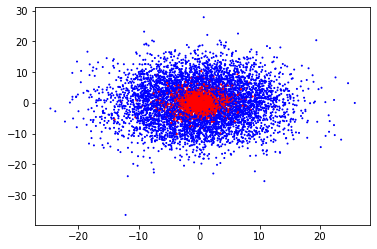

In [97]:
plt.scatter(test_X[:,0],test_X[:,1],c=['g' if class_int==1 else 'r' for class_int in test_y],s=1)

['b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'r',
 'b',
 'r',
 'b',
 'b',
 'r',
 'b',
 'r',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'r',
 'b',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'b',
 'b',
 'r',
 'r',
 'r',
 'b',
 'r',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b'